In [1]:
import numpy as np
from coords import x, y, t
from plotting import plot_curve, plot_curve2
from lagrange import lagrange, txt_lagrange

### Define the segments

In [2]:
t_seg = []
x_seg = []
y_seg = []

# create segment data
for i in range(0,len(x)-2,2):
    #print(i)
    ts = np.linspace(i+1,i+3,99)
    #print(f"ts={ts}")
    t_seg.append([i+1, i+2, i+3])
    x_seg.append([x[i], x[i+1], x[i+2]])
    y_seg.append([y[i], y[i+1], y[i+2]])

num_seg = len(t_seg)    

In [3]:
for i in range(num_seg):
    print(f"{i} t={t_seg[i]} x={x_seg[i]} y={y_seg[i]}")

0 t=[1, 2, 3] x=[2.3006077040432, 2.2444914233319, 0.9347771784421] y=[0.0445978242934, 0.1747875955436, 0.6794745259997]
1 t=[3, 4, 5] x=[0.9347771784421, 0.4427678081307, 0.7999122862435] y=[0.6794745259997, 1.5212035080068, 2.5078224437503]
2 t=[5, 6, 7] x=[0.7999122862435, 3.336389981814, 5.6459569596094] y=[2.5078224437503, 3.4600120555616, 2.7741348494085]
3 t=[7, 8, 9] x=[5.6459569596094, 6.4757271569233, 5.9439134472436] y=[2.7741348494085, 1.4813300897804, 0.6394071420449]
4 t=[9, 10, 11] x=[5.9439134472436, 5.557994860134, 5.0400654920648] y=[0.6394071420449, 0.2562255661913, 0.0344629349447]


### Lagrange polynomials

In [4]:
for i in range(num_seg):
    r = txt_lagrange(t_seg[i], x_seg[i], "t", 
                     xformat="d", yformat=".6f", 
                     one_row=True)
    print(f"{t_seg[i][0]}-{t_seg[i][-1]}   {r}")

1-3   1.150304 (t-2)(t-3) - 2.244491 (t-1)(t-3) + 0.467389 (t-1)(t-2)
3-5   0.467389 (t-4)(t-5) - 0.442768 (t-3)(t-5) + 0.399956 (t-3)(t-4)
5-7   0.399956 (t-6)(t-7) - 3.336390 (t-5)(t-7) + 2.822978 (t-5)(t-6)
7-9   2.822978 (t-8)(t-9) - 6.475727 (t-7)(t-9) + 2.971957 (t-7)(t-8)
9-11   2.971957 (t-10)(t-11) - 5.557995 (t-9)(t-11) + 2.520033 (t-9)(t-10)


In [5]:
for i in range(num_seg):
    r = txt_lagrange(t_seg[i], y_seg[i], "t", 
                     xformat="d", yformat=".6f", 
                     one_row=True)
    print(f"{t_seg[i][0]}-{t_seg[i][-1]}   {r}")

1-3   0.022299 (t-2)(t-3) - 0.174788 (t-1)(t-3) + 0.339737 (t-1)(t-2)
3-5   0.339737 (t-4)(t-5) - 1.521204 (t-3)(t-5) + 1.253911 (t-3)(t-4)
5-7   1.253911 (t-6)(t-7) - 3.460012 (t-5)(t-7) + 1.387067 (t-5)(t-6)
7-9   1.387067 (t-8)(t-9) - 1.481330 (t-7)(t-9) + 0.319704 (t-7)(t-8)
9-11   0.319704 (t-10)(t-11) - 0.256226 (t-9)(t-11) + 0.017231 (t-9)(t-10)


In [6]:
tp = []
xp = []
yp = []
for i in range(num_seg):
    #print(i)
    ts = np.linspace(t_seg[i][0],t_seg[i][-1],99)
    #print(f"ts={ts}")
    val_x = lagrange(t_seg[i],x_seg[i],ts)
    val_y = lagrange(t_seg[i],y_seg[i],ts)
    tp.extend(ts)
    xp.extend(val_x)
    yp.extend(val_y)

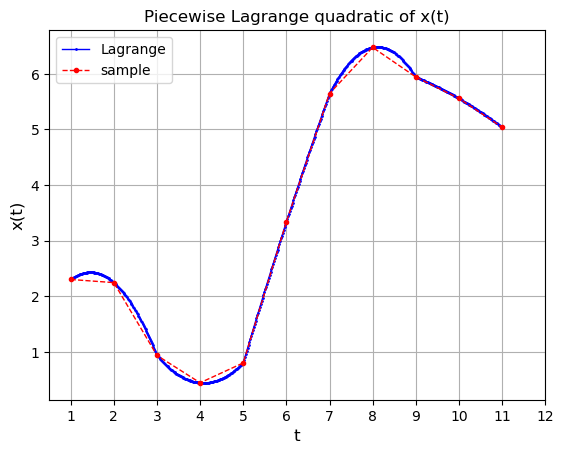

In [7]:
plot_curve2(tp, xp, t, x, xticks=t, xlabel="t", 
            ylabel="x(t)", 
            title="Piecewise Lagrange quadratic of x(t)")

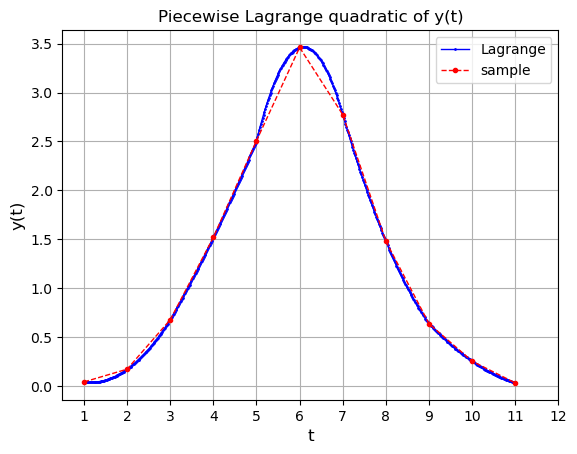

In [8]:
plot_curve2(tp, yp, t, y, xticks=t, xlabel="t", 
            ylabel="y(t)", 
            title="Piecewise Lagrange quadratic of y(t)")

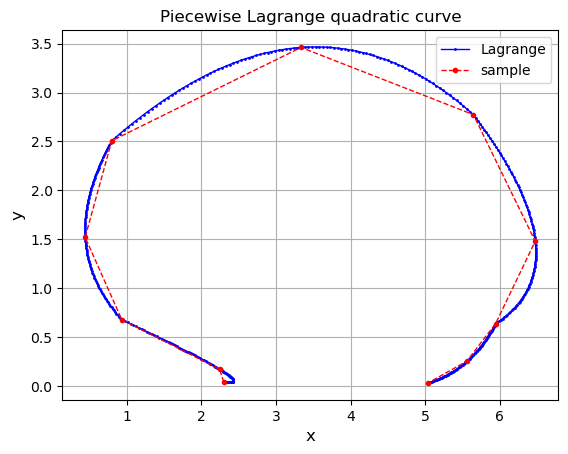

In [9]:
plot_curve2(xp, yp, x, y, xlabel="x", ylabel="y", 
            title="Piecewise Lagrange quadratic curve")

### Determine quadratic coefficients

In [10]:
def coeff(x, y):
    """
    Determines a b c coefficients for 
    quadratic Lagrange polynomial: 
    f(x) = ax^2 + bx + c
    """
    E = y[0]/((x[0]-x[1])*(x[0]-x[2]))
    F = y[1]/((x[1]-x[0])*(x[1]-x[2]))
    G = y[2]/((x[2]-x[0])*(x[2]-x[1]))  
    a = E + F + G
    b = -(E*(x[1]+x[2]) + F*(x[0]+x[2]) + G*(x[0]+x[1]))
    c = (E*x[1]*x[2]) + (F*x[0]*x[2]) + (G*(x[0]*x[1]))
    return a,b,c

format = ".3f"

tc = []
xc = []
yc = []
for i in range(num_seg):
    #print(i)
    #print(f"ts={ts}")
    tc.append((t_seg[i][0], t_seg[i][-1]))
    a,b,c  = coeff(t_seg[i],x_seg[i])
    xc.append((a,b,c))
    #rint(f"x: {a} {b} {c}")
    A,B,C = coeff(t_seg[i],y_seg[i])
    #print(f"y: {a} {b} {c}")
    yc.append((A,B,C))
    
    print(f"{i} {t_seg[i][0]}-{t_seg[i][-1]}   x(t)={a:{format}}t^2+{b:{format}}t+{c:{format}} y(t)={A:{format}}t^2+{B:{format}}t+{C:{format}}")
               
# print(tc)
# print(xc)
# print(yc)

0 1-3   x(t)=-0.627t^2+1.824t+1.103 y(t)=0.187t^2+-0.432t+0.289
1 3-5   x(t)=0.425t^2+-3.464t+7.506 y(t)=0.072t^2+0.335t+-0.976
2 5-7   x(t)=-0.113t^2+3.784t+-15.286 y(t)=-0.819t^2+9.962t+-26.824
3 7-9   x(t)=-0.681t^2+11.042t+-38.287 y(t)=0.225t^2+-4.674t+24.448
4 9-11   x(t)=-0.066t^2+0.868t+3.477 y(t)=0.081t^2+-1.917t+11.352


### Volume

In [13]:
def anti_derivative(t, coeff_x, coeff_y ):
    """
    defines the antiderivative of the function needed to integrate
    to compute the volume
    """
    a,b,c = coeff_x
    A,B,C = coeff_y
    # start,end = interv
   
    return ((2*a*(A**2))/6)*(t**6) + \
           ((4*a*A*B + b*(A**2))/5)*(t**5) + \
           ((2*a*(2*A*C+B**2) + 2*b*A*B)/4)*(t**4) + \
           ((4*a*B*C + b*(2*A*C+B**2))/3)*(t**3) + \
           ((2*a*C**2 + 2*b*B*C)/2)*(t**2) + (b*C**2)*t


total_vol = 0

# loop for the segments
for i in range(len(xc)):
    interv = tc[i] # the segment
    coeff_x = xc[i] # coefficients of x(t) in the segment
    coeff_y = yc[i] # coefficients of y(t) in the segment
    
    # compute integral
    vol = np.pi * \
        (anti_derivative(interv[1], coeff_x, coeff_y) - \
         anti_derivative(interv[0], coeff_x, coeff_y))
    
    total_vol = total_vol + vol
    print(f"segment[{i+1}]={interv} volume={vol}")

print(f"total_volume={total_vol}")


segment[1]=(1, 3) volume=-0.8775536142799113
segment[2]=(3, 5) volume=3.957715007466146
segment[3]=(5, 7) volume=155.25487709245505
segment[4]=(7, 9) volume=12.468582982620372
segment[5]=(9, 11) volume=-0.2649059891984721
total_volume=170.5387154790632


### Surface Area


In [12]:
def surface_f(t,coeff_x, coeff_y ):
    """
    defines the function for a given segment we need to integrate
    to compute the surface area
    """
    a,b,c = coeff_x
    A,B,C = coeff_y
    # start,end = interv
    return (A*(t**2)+B*t+C)*np.sqrt((2*a*t+b)**2+(2*A*t+B)**2)


from scipy.integrate import romberg
total_sa = 0

# loop for the segments
for i in range(len(xc)):
    interv = tc[i] # the segment
    coeff_x = xc[i] # coefficients of x(t) in the segment
    coeff_y = yc[i] # coefficients of y(t) in the segment
    
    # compute integral with Romberg method
    sa = 2 * np.pi * \
        romberg(surface_f, interv[0], interv[1], args=(coeff_x, coeff_y))
    
    total_sa = total_sa +sa
    print(f"segment[{i+1}]={interv} surface area={sa}")
    
print(f"total surface area = {total_sa}")

segment[1]=(1, 3) surface area=4.046399602057395
segment[2]=(3, 5) surface area=20.423230468738595
segment[3]=(5, 7) surface area=103.44249019553135
segment[4]=(7, 9) surface area=27.986905788976664
segment[5]=(9, 11) surface area=1.9600979179629596
total surface area = 157.85912397326697
